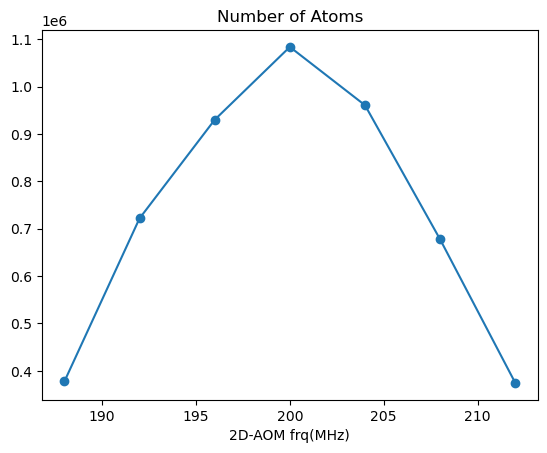

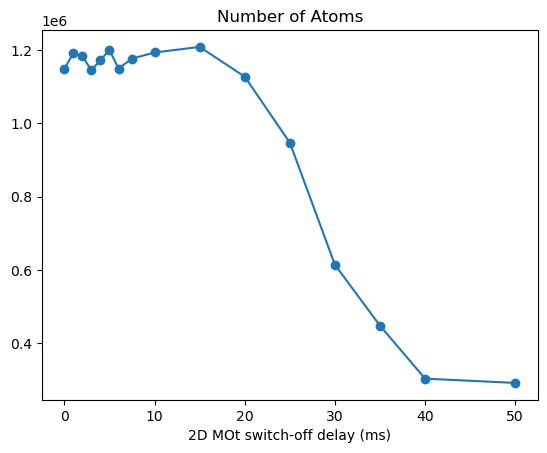

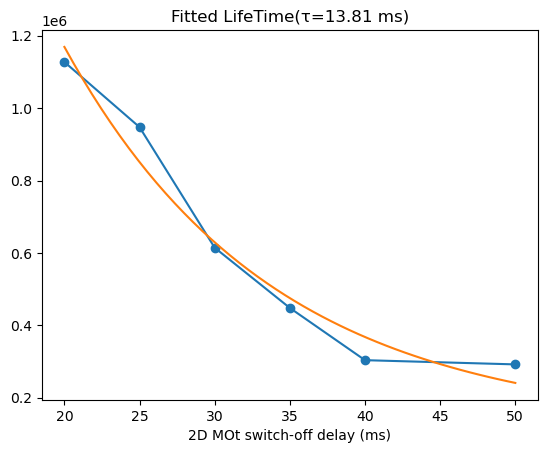

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt


# 2D MOT FRQ
fN=[]
N=[]
f=[]

with open('MOT_2D.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        N.append(int(row['number_of_atoms']))
        fN.append(int(row['fit_number_atoms']))
        f.append(int(row['twoD_FRQ']))




plt.plot(f,fN, '-o')
plt.title('Number of Atoms')
plt.xlabel('2D-AOM frq(MHz)')
plt.show()

fN=[]
N=[]
delay=[]
with open('MOT_2Delay.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        N.append(int(row['number_of_atoms']))
        fN.append(int(row['fit_number_atoms']))
        delay.append(float(row['twoD_delay']))

delay=[t*1e-3 for t in delay]

plt.plot(delay,fN, '-o')
plt.title('Number of Atoms')
plt.xlabel('2D MOt switch-off delay (ms)')
plt.show()

from scipy.optimize import curve_fit

# Define a 2D Gaussian function
def expo(t, amplitude, tau, Co):
    return Co+ amplitude * np.exp(-(t/tau))

ddelay=[]
ffN=[]
for i in range(10,len(delay)):
    ddelay.append(delay[i])
    ffN.append(fN[i])

# Fit the 2D Gaussian to the image
initial_guess = (1e+6, 55, 0)  # Initial guess for amplitude, xo, yo, sigma_x, sigma_y, theta
low=[0,0,0]
upper=[float('inf'),float('inf'),float('inf')]
bounds=[low, upper]
popt, _ = curve_fit(expo, ddelay, ffN, p0=initial_guess, bounds=bounds)

# Extract the parameters
amplitude, tau, Co = popt

time = np.linspace(np.min(ddelay), np.max(ddelay), int(np.max(ddelay)))


plt.plot(ddelay,ffN, '-o')
plt.plot(time,expo(time,amplitude,tau,Co))
plt.title('Fitted LifeTime(τ=%s ms)'%(int(tau*100)/100))
plt.xlabel('2D MOt switch-off delay (ms)')

plt.show()

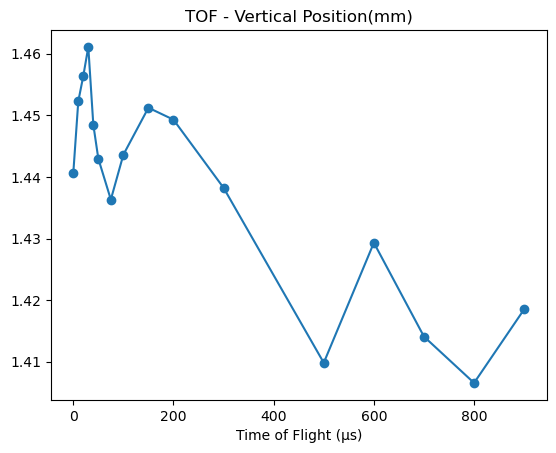

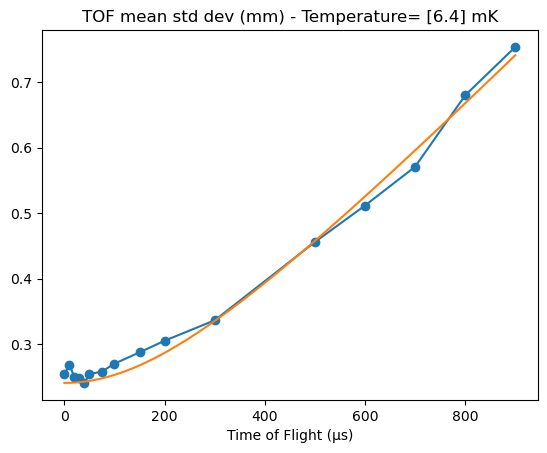

In [103]:
#MOT TOF

yo=[]
sigma_x=[]
sigma_y=[]
TOF=[]

with open('TOF.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        yo.append(float(row['yo']))
        sigma_x.append(float(row['sigma_x']))
        sigma_y.append(float(row['sigma_y']))
        TOF.append(float(row['TOF']))


yo=[i*32.5*1e-3 for i in yo]

sigma_a=[np.sqrt(i**2/2+j**2/2) for i, j in zip(sigma_x,sigma_y)]
sigma_a=[a*(32.5*1e-3) for a in sigma_a]


plt.plot(TOF,yo, '-o')
plt.title('TOF - Vertical Position(mm)')
plt.xlabel('Time of Flight (μs)')
plt.show()


sigma_a=[i*1e-3 for i in sigma_a]
TOF=[i*1e-6 for i in TOF]
s0=min(sigma_a)
from scipy.optimize import curve_fit

# Define a 2D Gaussian function
def Func(t, Tem):

    atom_mass = 1.67*88e-27
    kB=1.38*1e-23
    v=kB/atom_mass
    return np.sqrt(s0*s0+v*Tem*t*t)


# Fit the 2D Gaussian to the image
initial_guess = (6e-3)  # Initial guess for amplitude, xo, yo, sigma_x, sigma_y, theta
low=[0]
upper=[float('inf')]
bounds=[low, upper]
popt, _ = curve_fit(Func, TOF, sigma_a, p0=initial_guess, bounds=bounds)

# Extract the parameters
T= popt

time = np.linspace(np.min(TOF), np.max(TOF), int(np.round(np.max(TOF)*1e+6)))


TOF=[i*1e+6 for i in TOF]
sigma_a=[i*1e+3 for i in sigma_a]

plt.plot(TOF,sigma_a, '-o')

TIME=[i*1e+6 for i in time]
FF=[]
FF=Func(time, T)

FF=[float(i*1e+3) for i in FF]

plt.plot(TIME, FF)

T=np.round(T*1e+3*10)/10
plt.title('TOF mean std dev (mm) - Temperature= %s mK' %T)
plt.xlabel('Time of Flight (μs)')
plt.show()




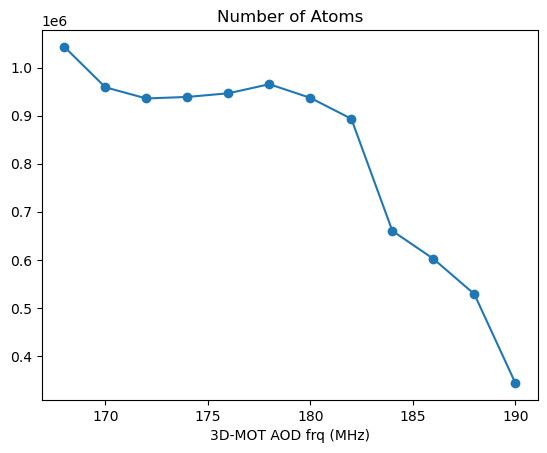

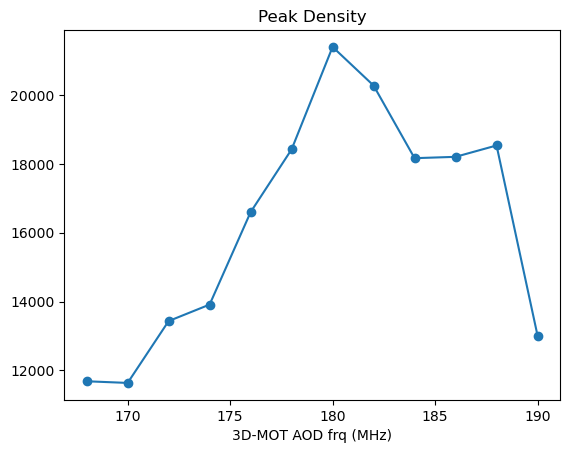

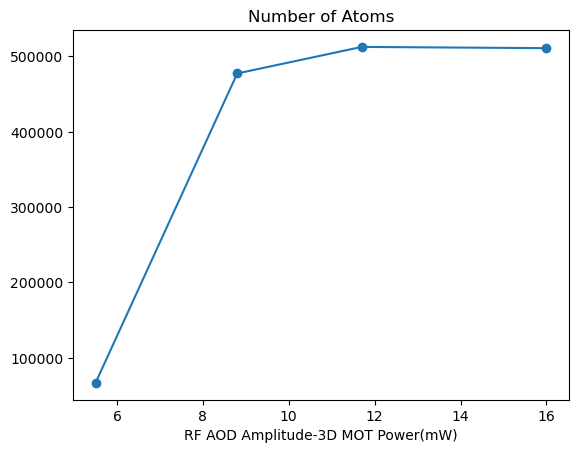

In [82]:
#3D MOT AOD Power and Frequency
import csv

fN=[]
FRQ=[]
N=[]
Po=[]
den=[]

with open('MOT_3D.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        N.append(int(row['number_of_atoms']))
        # sigma_x.append(int(row['sigma_x']))
        # TOF.append(float(row['TOF']))
        FRQ.append(float(row['MOT_FRQ']))
        # Po.append(float(row['Power_MOT']))
        den.append(float(row['density']))
        fN.append(int(row['fit_number_atoms']))        

plt.plot(FRQ,fN,'-o')

# plt.plot(FRQ,N)


plt.title('Number of Atoms')
plt.xlabel('3D-MOT AOD frq (MHz)')

plt.show()

plt.plot(FRQ,den,'-o')
plt.title('Peak Density')
plt.xlabel('3D-MOT AOD frq (MHz)')
plt.show()

fN=[]
FRQ=[]
N=[]
Po=[]
with open('MOTpower.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        N.append(int(row['number_of_atoms']))
        # sigma_x.append(int(row['sigma_x']))
        # TOF.append(float(row['TOF']))
        FRQ.append(float(row['MOT_FRQ']))
        Po.append(float(row['Power_MOT']))
        
        fN.append(int(row['fit_number_atoms']))     

plt.plot(Po,fN, '-o')
plt.title('Number of Atoms')
plt.xlabel('RF AOD Amplitude-3D MOT Power(mW)')

plt.show()

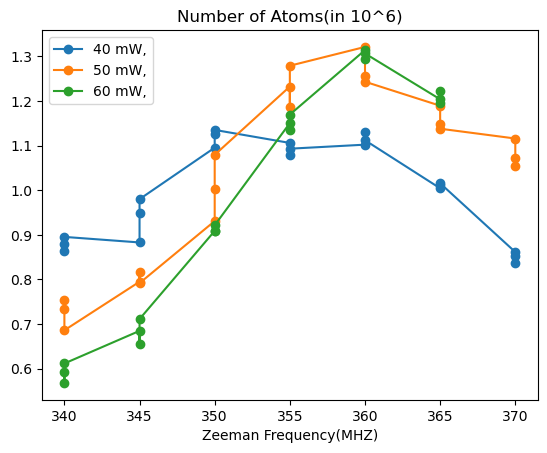

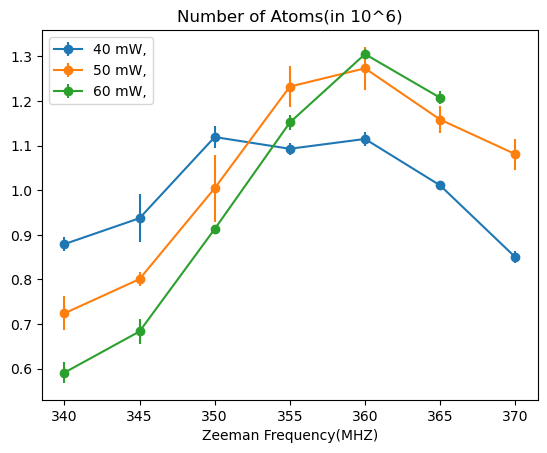

In [101]:
#ZEEMAN Power and Frequency
import csv
import matplotlib as mp
import matplotlib.pyplot as plt

fN=[]
FRQ=[]
N=[]
Po=[]

with open('MOTZeeman.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        Po.append(int(row['ZeemanPwr']))
        FRQ.append(float(row['ZeemanFrq']))
        
        fN.append(int(row['fit_number_atoms'])) 

data=[fN,Po,FRQ]

D=[]
for Poo in [40,50,60]:
    A,B=[],[]
    for j in range(0,len(fN)):
        if Poo==Po[j]:
            A.append(fN[j]*1e-6)
            B.append(FRQ[j])
    D.append([A,B])



plt.plot(D[0][1],D[0][0], '-o')

plt.plot(D[1][1],D[1][0], '-o')

plt.plot(D[2][1],D[2][0],'-o')

plt.title('Number of Atoms(in 10^6)')
plt.xlabel('Zeeman Frequency(MHZ)')
str1='%s mW,'%40
str2='%s mW,'%50
str3='%s mW,'%60
plt.legend([str1,str2,str3])
plt.show()




mean=0
middle=0
ATOMS=[]
FRQ=[]
for j in range(0,3): #to be put 3
    mean=D[j][0]
    middle=D[j][1]
    MD=[]
    MN=[]
    MN_error=[]
    i=0
    while i<len(mean): 
        mn=[]
        for k in range(0,3): 
            mn.append(mean[i])
            i+=1
        MD.append(middle[i-1])
        mm=sum(mn)/3
        su=max(mn)-mm
        giù=mm-min(mn)
        error=max(su,giù)
        MN_error.append(error)
        MN.append(mm)
    ATOMS.append(MN)
    FRQ.append(MD)
    plt.errorbar(MD,MN, yerr= MN_error,fmt='-o')
    plt.legend([str1,str2,str3])
plt.title('Number of Atoms(in 10^6)')
plt.xlabel('Zeeman Frequency(MHZ)')
plt.show()




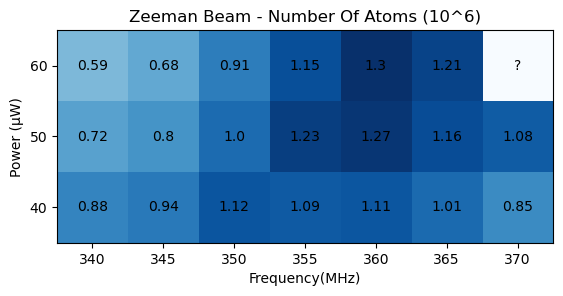

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for x and y
y = [40, 50, 60]  # Replace with your own data



plt.imshow(np.reshape(ATOMS, (3,-7)), cmap='Blues', interpolation='nearest', origin='lower')

plt.ylabel('Power (μW)')
plt.xlabel('Frequency(MHz)')
plt.title('Zeeman Beam - Number Of Atoms (10^6)')
plt.yticks(range(3), y)
frq=[int(i) for i in FRQ[0]]
plt.xticks(range(7), frq)
for i in range(3):
    for j in range(7):
        if not (i==2 and j==6):
            plt.text(j, i,round(ATOMS[i][j]*100)/100, ha='center', va='center', color='black')
        else :
            plt.text(j, i,'?', ha='center', va='center', color='black')
# Show the plot
plt.show()